# Longitudinal Wave Metric Search - Birkoff
## Metric is always Schwarschild - with varying mass at different radius
So the mass inside R is what matters.

Constant frequency, wavelength goes as R**2, so wave is superluminal, but not instant. Wave speed cancels out of equation


In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import einsteinpy

from sympy import symbols, sin, cos, sinh, ln, lambdify
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()
print(einsteinpy.__version__)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)



0.4.0


# sin wave outgoing 


F*M*w*cos(w*(t + 1/(r*v))) - F*M
0.5*F*M*w*cos(w*(t - 1/(r*v)))/(r**2*v) - 0.5*F*M*w*cos(w*(t + 1/(r*v)))/(r**2*v)
1/r
-1/r**2


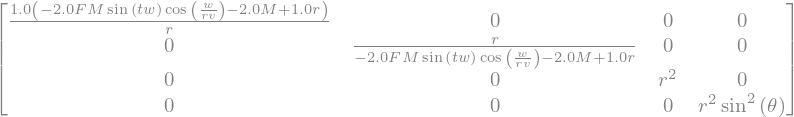

In [2]:
t, r, theta, phi = sympy.symbols("t r theta phi")
G, M, F, a, w, v = sympy.symbols("G M F a w, v")

# standing wave solutions are the easiest (for me) to imagine and model mathematically
# a_out is outgoing energy, so for a given time the mass will look bigger the farther out you are, as mass leaving has not yet passed you by

# dPhi/dR where phi is the phase will get us w/v, so if v goes as r (linear speed), we must use a phase as below with ln() 

# a_in = M + M*F*(t - r/v) + M*F/w*sin(w*(t - r/v))
# a_out = M - M*F*(t - r/v) + M*F/w*sin(w*(t + r/v))
a_in = M + M*F*(t - 1/(r*v)) + M*F*sin(w*(t - 1/(r*v)))
a_out = M - M*F*(t - 1/(r*v)) + M*F*sin(w*(t + 1/(r*v)))
#a = M*(1 - F*2*sin(w*t))

a = 1/2*(a_in + a_out)

#slope of mass loss for a_out is never lower than 0, which is what we need.
mT = sympy.diff(a_out, t)
print(mT)
mR = sympy.diff(a, r)
print(mR)

print(sympy.diff(ln(r/5), r))
print(sympy.diff(1/r, r))


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]

#take your pick
#list2d[0][0] = -mT*mT/(mR*mR)/(1 - 2*a/r)
#list2d[0][0] = mT/mR/(1 - 2*a/r)


list2d[0][0] = (1 - 2*a/r)

list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - 2*a/r) 
list2d[2][2] = (r)**2
list2d[3][3] = (r)**2*(sympy.sin(theta) ** 2)

list2d[0][0] = list2d[0][0].simplify()
list2d[1][1] = list2d[1][1].simplify()


sch = MetricTensor(list2d, [t, r, theta, phi])
sch.tensor()



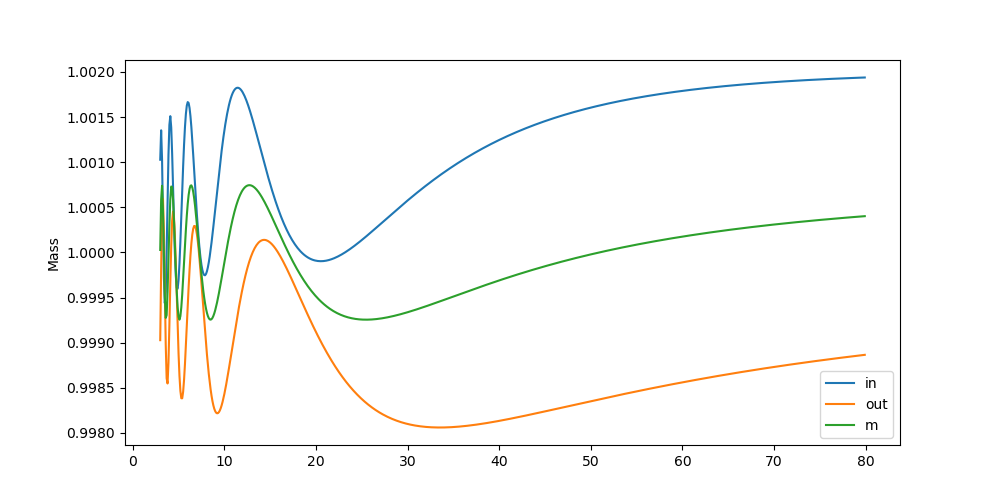

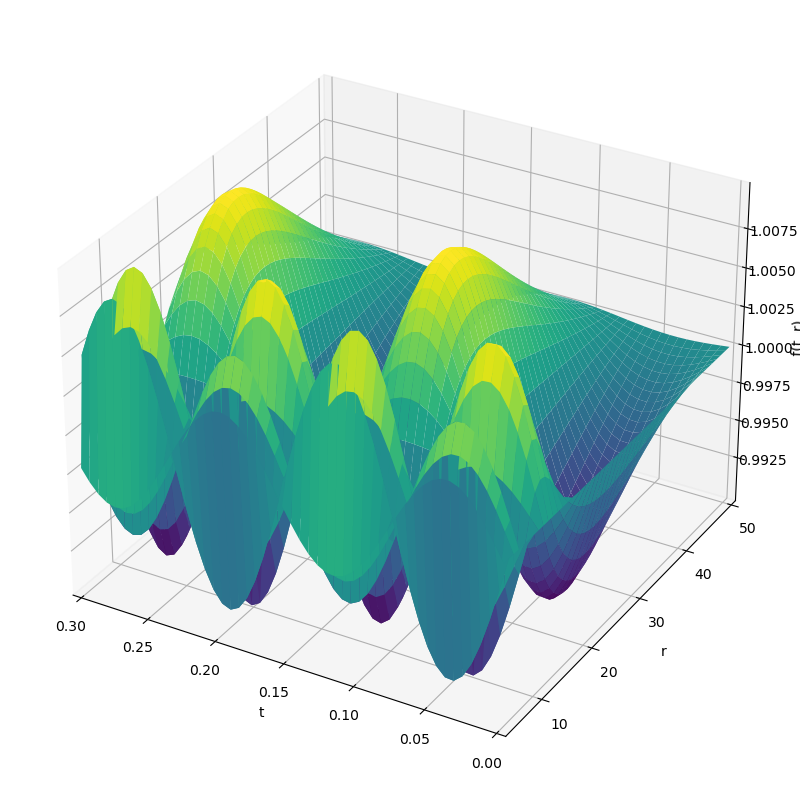

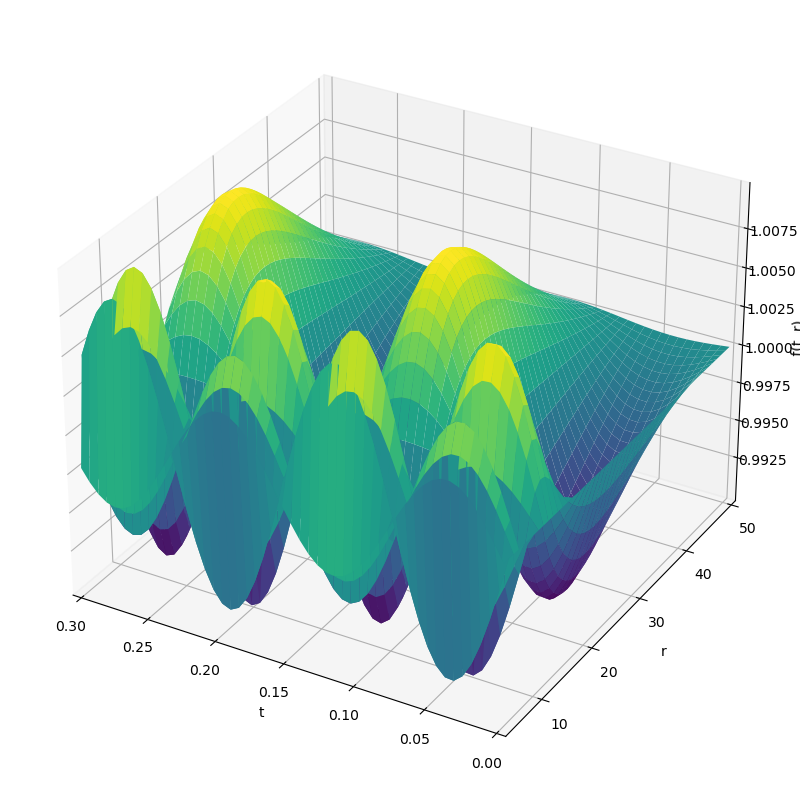

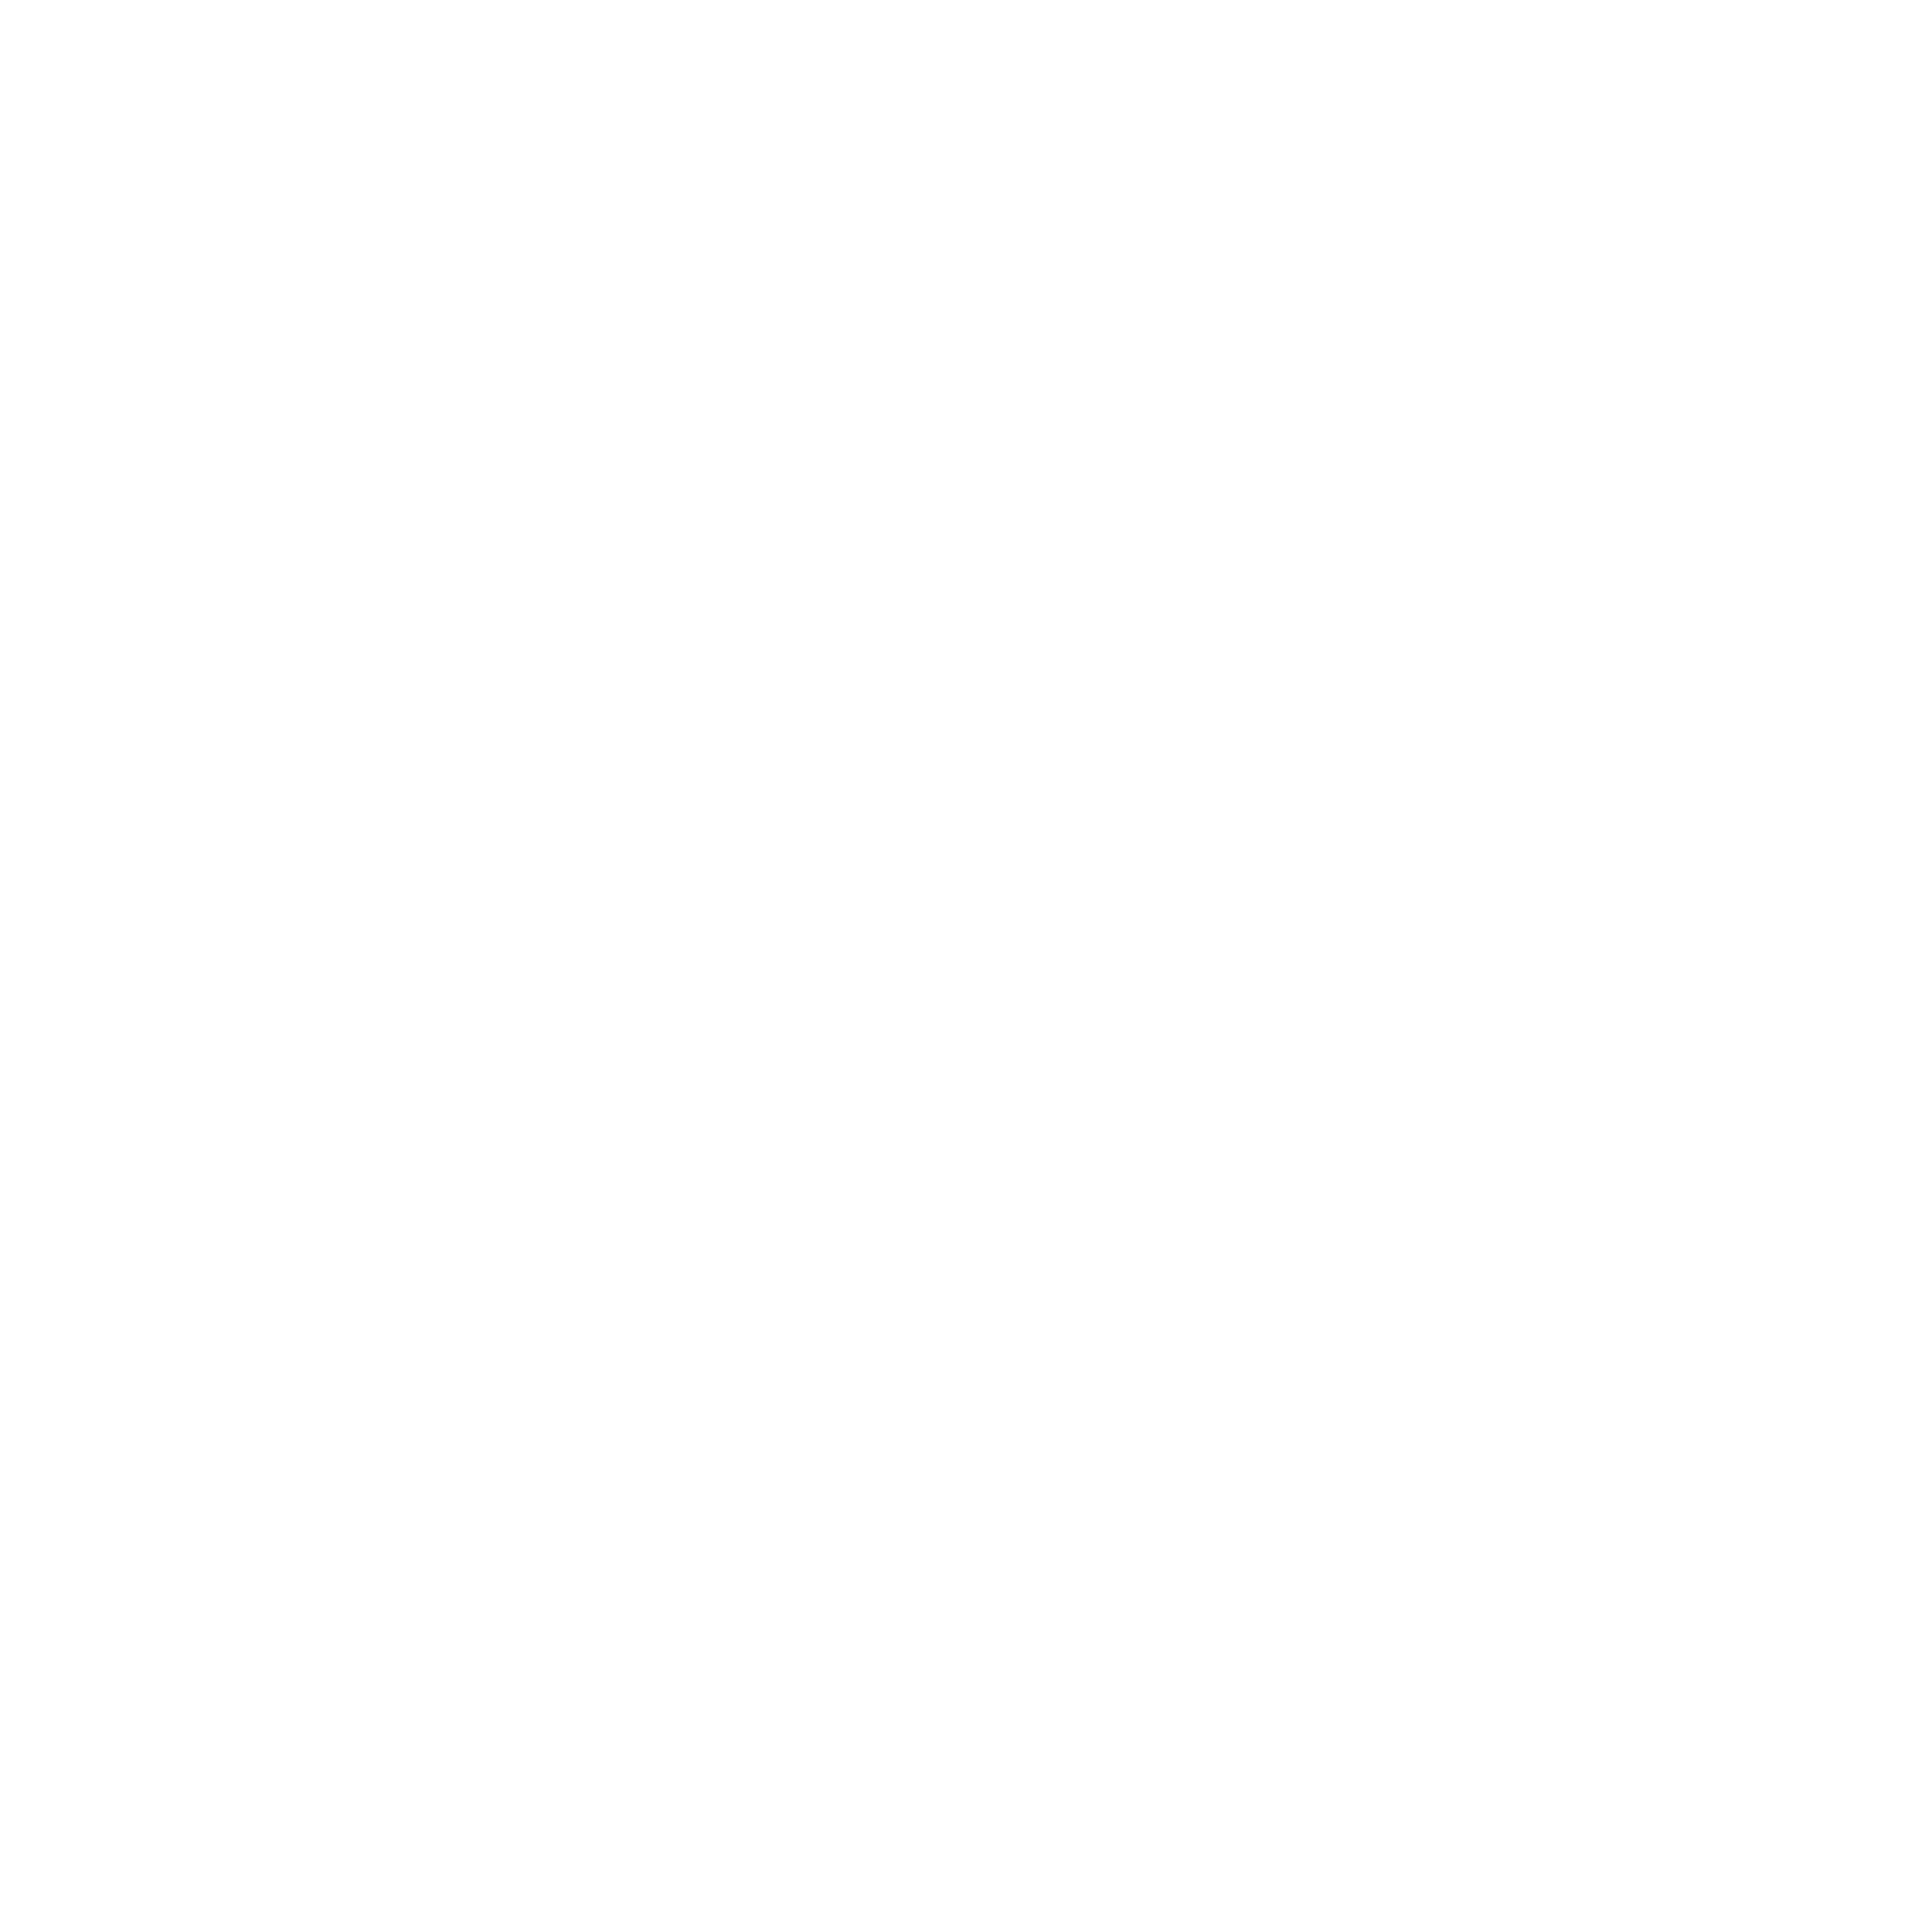

In [14]:
###Plot mass function
# first make the tensor into a function, printing 

mass_in = lambdify([t, r, M, F, w, v], a_in)
mass_out = lambdify([t, r, M, F, w, v], a_out)
mass_l = lambdify([t, r, M, F, w, v], a)

r_vals = np.arange(3.0, 80.0, 0.1)
t_vals = np.arange(0.0, 0.4, 0.001)
T, R = np.meshgrid(t_vals, r_vals)

the_w = 40
the_v = 0.5

m_in_vals = mass_in(1, r_vals, 1, 0.001, the_w, the_v)
m_out_vals = mass_out(1, r_vals, 1, 0.001, the_w, the_v)
m_l_vals = mass_l(1, r_vals, 1, 0.001, the_w, the_v)
#Z = mass_l(t_vals, r_vals, 1, 0.001, the_w, the_v)

%matplotlib widget




plt.figure(figsize=(10, 5))
plt.plot(r_vals, m_in_vals, label='in')
plt.plot(r_vals, m_out_vals, label='out')
plt.plot(r_vals, m_l_vals, label='m')
plt.ylabel("Mass")
plt.legend(loc="lower right")
plt.show()


f = lambda t, r: a.subs({M:1, F:0.01, w:the_w, v:the_v})
plt.figure(figsize=(20, 20))
sympy.plotting.plot3d(f(t, r), (t, 0.3, 0), (r, 4, 50), size=(8, 8))
plt.show()

#fXY = lambda X, Y: a.subs({M:1, F:0.01, w:the_w, v:the_v})
#Z = f(T, R)
#f_func = np.vectorize(f)    # vectorize
#plt.figure()
#fig, ax = plt.subplots(figsize=(6,6))
#ax.contourf(T,R,Z)
#plt.show()




#### Figure - mass as a function of R for a fixed time. Total mass as seen 

### Calculating the Einstein Tensor (with both indices covariant)

In [ ]:
einst = EinsteinTensor.from_metric(sch)
#einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

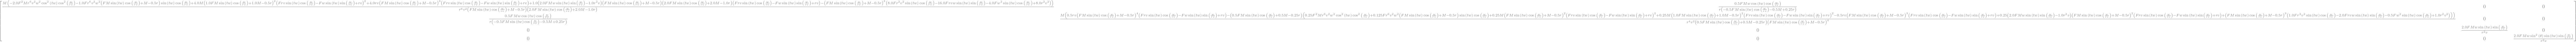

In [17]:
ri = RicciTensor.from_metric(sch)
#ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

(t, r, theta, phi, F, M, v, w)


Text(0.5, 1.0, 'Einstein Tensor, G')

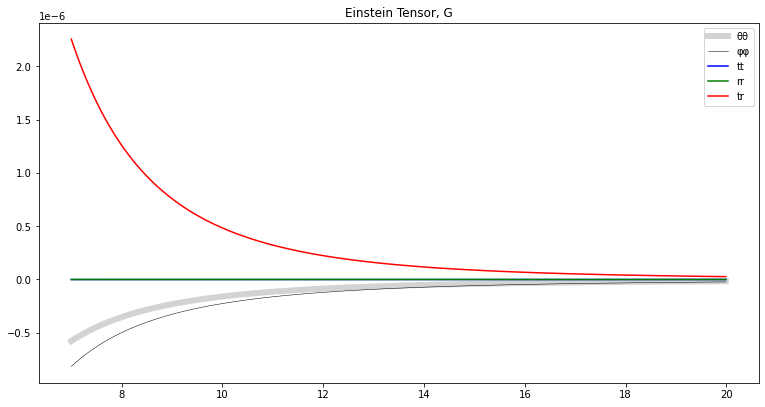

In [18]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 

theta = 1
phi = 1
F = 0.01
M = 1
w = 5
t = 1.31312
v = 0.2


#Make x values - which we will sub in for r 
x = np.arange(7.0, 20.0, 0.01)

# Call the functions
# note: what scale to use on these ? when is it appropriate to divide by r**2, etc? 
tt = func(t,x,theta, phi, F, M, w, v)[0][0]

tr = func(t,x,theta, phi, F, M, w, v)[0][1]/(x*x)

rr = func(t,x,theta, phi, F, M, w, v)[1][1]/(x*x)**2

hh = func(t,x,theta, phi, F, M, w, v)[2][2]/(x*x)**2

pp = func(t,x,theta, phi, F, M, w, v)[3][3]/(x*x*sin(theta)*sin(theta))**2


fig=plt.figure(figsize=(10, 5))
ax=fig.add_axes([0,2,1.0,1.0])

ax.plot(x,hh, "lightgrey",label="θθ", linewidth=6.0)
ax.plot(x,pp, "black",label="φφ", linewidth=0.5)

ax.plot(x,tt, "-b", label="tt")
ax.plot(x,rr, "-g", label="rr")
ax.plot(x,tr, "-r", label="tr")

ax.legend(loc="upper right")
ax.set_title("Einstein Tensor, G")


#NOT Zero 


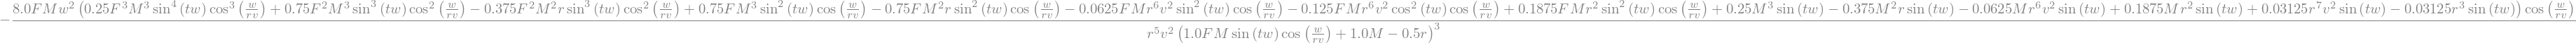

In [19]:
# Ricci scalar
R = RicciScalar.from_riccitensor(ri)
R.simplify()
R.expr


No handles with labels found to put in legend.


(t, r, theta, phi, F, M, v, w)


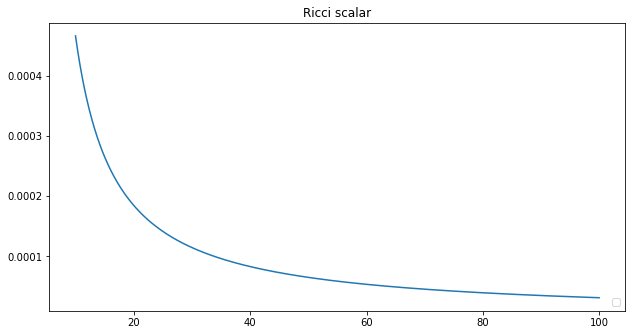

In [21]:
#plot the Ricci scalar

args, funcR = R.tensor_lambdify()
print(args) # these are the argument values 

t = 5

theta = 1
phi = 1
F = 0.01
M = 1
w = 0.5
v = 1

#Make x values - which we will sub in for r 
x = np.arange(10.0, 100.0, 0.04)

# Call the functions
ricci = funcR(t,x,theta, phi, F, M, v, w)

fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
ax.set_title("Ricci scalar")
ax.legend(loc="lower right")
ax.plot(x,ricci, label="Ricci scalar")



In [22]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

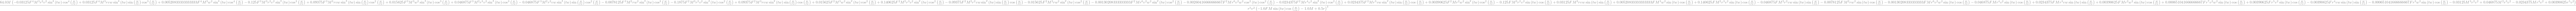

In [23]:
weyl[0,1,0,1]

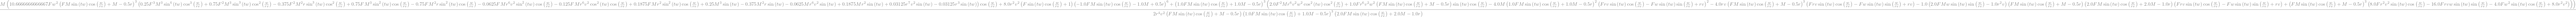

In [24]:
weyl[0,2,0,2]

In [25]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

t = 1

theta = 1
phi = 1
F = 0.1
M = 1
w = 10



#Make x values - which we will sub in for r 
x = np.arange(4, 20.0, 0.04)

# Call the functions
y = func(t,x,theta, phi, F, M, w)[0][1][0][1]/x
z = -func(t,x,theta, phi, F, M, w)[0][2][0][2]/(x*x) # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("Weyl tensor")




(t, r, theta, phi, F, M, v, w)


TypeError: _lambdifygenerated() missing 1 required positional argument: 'w'